## Partie D)

Écrire un code de calcul générique (c-à-d pour un Ntot non précisé d’avance) pour résoudre l’Éq. (1) (avez S une réaction du premier ordre ou un terme source constant en fonction des spécifications du problème). Celui-ci nous servira particulièrement pour le Devoir 2.


$ C_{i = 1, ..., 3}^{t} (1 - \Delta t k) = C_{i-1}^{t+1} (\frac{- \Delta t D_{eff}}{\Delta r}) 
+ C_{i}^{t+1} (1 + \frac{2 \Delta t D_{eff}}{\Delta r^2} + \frac{\Delta t D_{eff}}{r \Delta r})
+ C_{i+1}^{t+1} (\frac{-\Delta t D_{eff}}{\Delta r^2} - \frac{\Delta t D_{eff}}{r \Delta r})$

$C_0^t (1 - \Delta t k) = C_0^{t+1} $ (condition neuman à $r=0$)

$ C_{4}^{t} = C_e $ (condition dirichlet à $r = R$)

In [2]:
%load_ext autoreload

In [24]:
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from Diffusion import Diffusion
from IPython.display import clear_output

In [96]:
np.logspace(1, 3)

array([  10.        ,   10.98541142,   12.06792641,   13.25711366,
         14.56348478,   15.9985872 ,   17.57510625,   19.30697729,
         21.20950888,   23.29951811,   25.59547923,   28.11768698,
         30.88843596,   33.93221772,   37.2759372 ,   40.94915062,
         44.98432669,   49.41713361,   54.28675439,   59.63623317,
         65.51285569,   71.9685673 ,   79.06043211,   86.85113738,
         95.40954763,  104.81131342,  115.13953993,  126.48552169,
        138.94954944,  152.64179672,  167.68329368,  184.20699693,
        202.35896477,  222.29964825,  244.20530945,  268.26957953,
        294.70517026,  323.74575428,  355.64803062,  390.69399371,
        429.19342601,  471.48663635,  517.94746792,  568.9866029 ,
        625.05519253,  686.648845  ,  754.31200634,  828.64277285,
        910.29817799, 1000.        ])

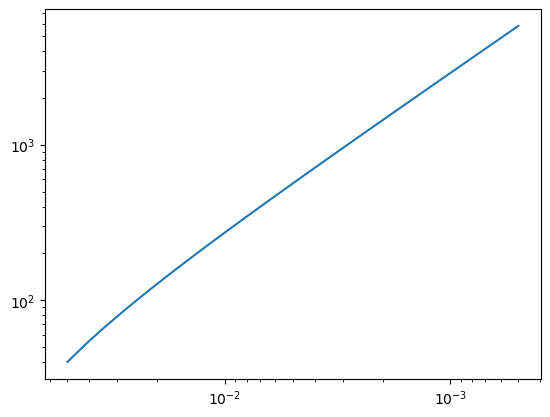

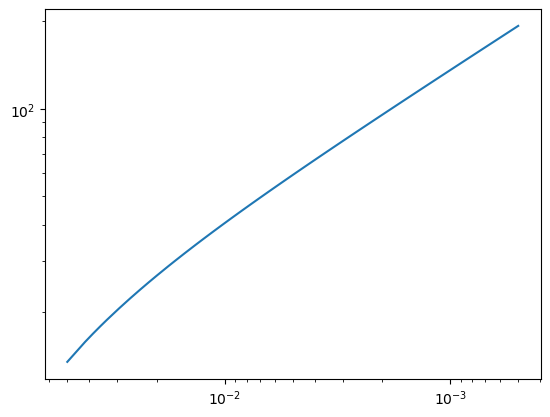

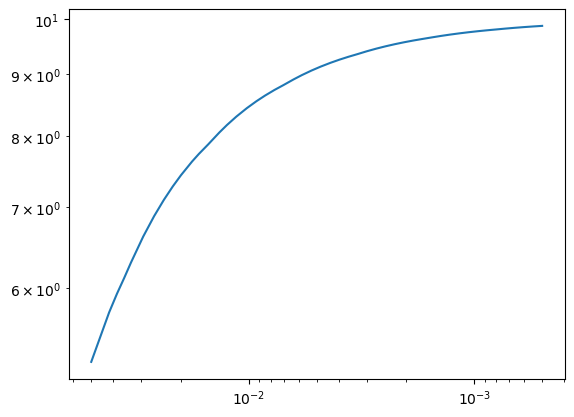

In [98]:
def solve_from_n(n):
    problem = Diffusion(n)
    change = 100
    while ~np.isclose(change, 0):
        C_vals = problem.C_values.copy()
        _ = problem.step(1e6, order=0)
        change = np.sum(np.abs(C_vals - problem.C_values))
    return problem.C_values, problem.R_values
n_values = [int(n) for n in np.logspace(1, 3)]
L1_values = []
L2_values = []
Linf_values = []
for n in n_values:   
    C_values, R_values = solve_from_n(n)
    C_analytical = analytical_solution(R_values)
    L1 = np.sum(np.abs(C_analytical - C_values))
    L2 = np.sqrt(np.sum((C_analytical - C_values) ** 2))
    Linf = np.max(np.abs(C_analytical - C_values))
    L1_values.append(L1)
    L2_values.append(L2)
    Linf_values.append(Linf)
    
plt.figure()
plt.plot(0.5/np.array(n_values), L1_values)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.gca().invert_xaxis()
plt.figure()
plt.plot(0.5/np.array(n_values), L2_values)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.gca().invert_xaxis()

plt.figure()
plt.plot(0.5/np.array(n_values), Linf_values)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.gca().invert_xaxis()


8.660063641606377e-09


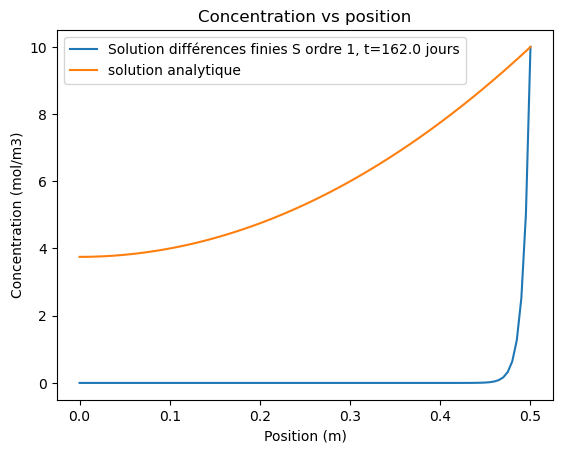

In [85]:
problem = Diffusion(100)
t = 0
times = [t]
change = 100
while ~np.isclose(change, 0):
    C_vals = problem.C_values.copy()
    t = problem.step(1e6, order=0)
    times.append(t)
    change = np.sum(np.abs(C_vals - problem.C_values))
    clear_output(wait=True)
    print(change)

plt.plot(problem.R_values, problem.C_values, label=f'Solution différences finies S ordre 1, t={np.around(times[-1]/(3600*24),0 )} jours')

def analytical_solution(r):
    C = 0.25 * 1e-8/1e-10  * 0.5**2 * ((r/0.5)**2 - 1) + 10
    return C

plt.plot(problem.R_values, analytical_solution(problem.R_values), label='solution analytique')

ax = plt.gca()
ax.set_title('Concentration vs position')
ax.set_xlabel('Position (m)')
ax.set_ylabel('Concentration (mol/m3)')
ax.legend()

8.880654878140604e-09


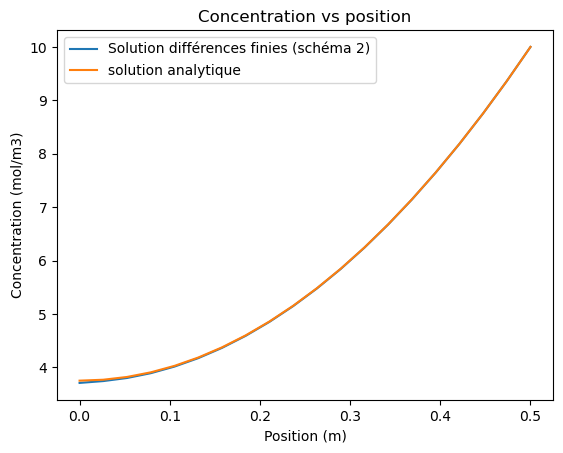

In [86]:
problem = Diffusion(20, scheme=2)
t = 0
times = [t]
change = 100
n_steps = 0
n_steps_max = 1000
while ~np.isclose(change, 0):
    n_steps += 1
    C_vals = problem.C_values.copy()
    t = problem.step(1e8, order=0)
    times.append(t)
    change = np.sum(np.abs(C_vals - problem.C_values))
    clear_output(wait=True)
    print(change)
    
plt.plot(problem.R_values, problem.C_values, label='Solution différences finies (schéma 2)')

def analytical_solution(r):
    C = 0.25 * 1e-8/1e-10 * 0.25 * ((r/0.5)**2 - 1) + 10
    return C

plt.plot(problem.R_values, analytical_solution(problem.R_values), label='solution analytique')

ax = plt.gca()
ax.set_title('Concentration vs position')
ax.set_xlabel('Position (m)')
ax.set_ylabel('Concentration (mol/m3)')
ax.legend()